# Capítulo 2 - Projeto de Aprendizado Ponta a Ponta

In [1]:
# Importar pandas para análise exploratória de dados
import pandas as pd

## Importar Dados

In [2]:
# Ler csv dos dados
Dados = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

# Printar primeira linhas do DataFrame
Dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Explorar Variáveis

In [3]:
# Informações acerca dos dados contidos em cada uma das colunas
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
# Descrever os dados em cada coluna
Dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


Pelas informações acima, todas as colunas exceto a "ocean_proximity" são float, o que significa que estas seguram valores decimais. É possível perceber que não há valores nulos em quase todas as colunas, exceto na coluna "Total Bedrooms" aonde 207 observações não estão disponíveis. Vamos preencher os valores nulos com a mediana da coluna

In [4]:
# Criar variável com a mediana da coluna
median_total_bedrooms = Dados["total_bedrooms"].median()

# Preencher coluna
Dados["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)

# Contar quantidade de linhas nulas na coluna
Dados["total_bedrooms"].isna().sum()

0

Colunas object geralmente contém variáveis categóricas:

In [5]:
# Valores únicos na coluna ocean_proximity
Dados["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

A coluna ocean_proximity contém valores acerca de quão perto a casa em questão está do oceano

In [6]:
# Checar a representatividade de cada valor único na coluna no total de observações (valores em %)
Dados["ocean_proximity"].value_counts() / Dados.shape[0]

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

A maior parte das casas (44%) parece estar a menos de uma hora do oceano, com um valor ínfimo estando em ilhas, 11% perto de portos, 12% perto dos oceanos e 31% em "terra firme"

In [29]:
# Importar Encoder do sklearn
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse=False)

# Criar coluna ocean_proximity como variável categórica (Dummy em econometria)
ocean_proximity_cat = Encoder.fit_transform(Dados[["ocean_proximity"]])

# Print
ocean_proximity_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [8]:
# Observar as catergorias correspondentes a cada número na coluna de ocean_proximity
Encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Visualizar características do DataSet

<AxesSubplot:>

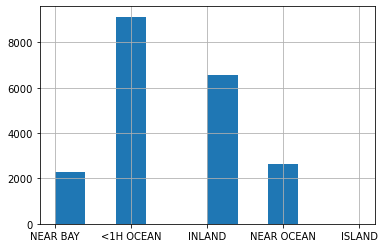

In [9]:
# Plotar histograma da coluna de proximidade ao oceano
Dados["ocean_proximity"].hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

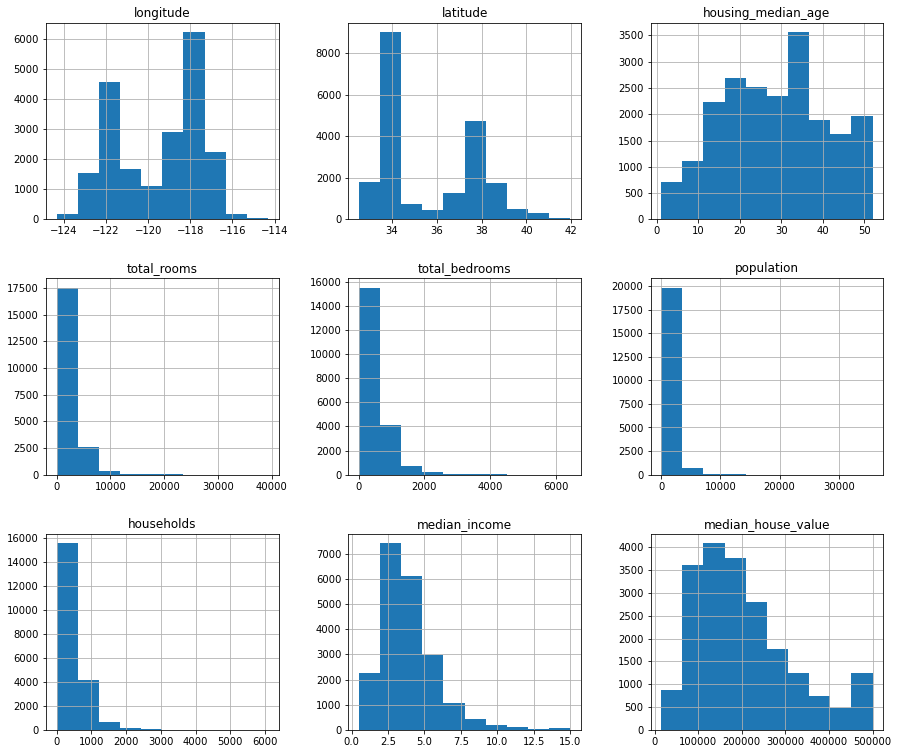

In [10]:
# Plotar a distribuição de cada atributo numérico
Dados.hist(figsize=(15,13))

Parecem haver uma quantidade significativa de outliers na coluna de valor mediano das casas, podemos visualizar isto melhor com um gráfico de boxplot

<AxesSubplot:>

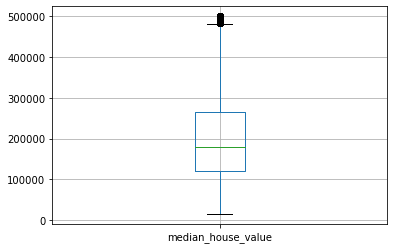

In [11]:
Dados.boxplot(column="median_house_value")

In [12]:
# Matrix de correlação da variável de mediana do valor das casas em relação as outras variáveis
Dados.corr()["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049457
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

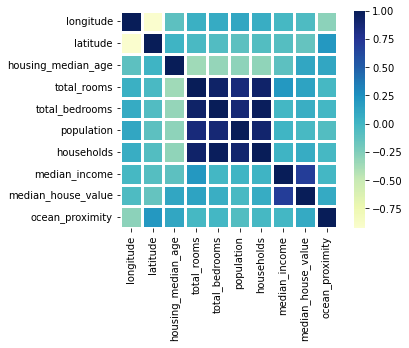

In [69]:
# Visualização das correlações em uma matriz
import seaborn as sns
sns.heatmap(Dados.corr(), square=True, linewidths=3, center=0, cmap="YlGnBu")

In [27]:
# Visualização das correlações por meio do pandas
Dados.corr().style.background_gradient(cmap="Blues")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


É possível perceber que a correlação entre a mediana da renda e o valor das casas é muito grande, com correlações mais fracas, mas ainda positivas, com o total de cômodos numa casa e a mediana da idade dos moradores. Podemos observar melhor a relação entre as variáveis por meio de um scatter plot:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

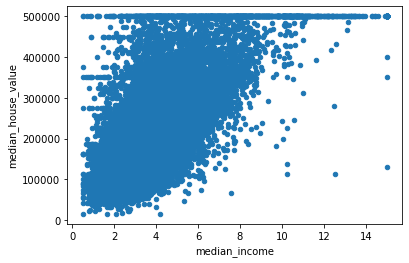

In [42]:
# Scatter plot para median_income e median_house_value
Dados.plot(kind="scatter", x="median_income", y="median_house_value")

## Preparo para modelagem

In [34]:
# Feature Engineering
def Feature_Engineering(Dados):
    Dados["Bed_Per_House"] = Dados["total_bedrooms"] / Dados["households"]
    Dados["Pop_Per_House"] = Dados["population"] / Dados["households"]
    Dados["Rooms_Per_House"] = Dados["total_rooms"] / Dados["households"]

    return Dados

Dados_Novas_Variaveis = Feature_Engineering(Dados)
Dados_Novas_Variaveis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Bed_Per_House,Pop_Per_House,Rooms_Per_House
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,2.181467,6.281853


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Bed_Per_House,Pop_Per_House,Rooms_Per_House
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,2.181467,6.281853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.133333,2.560606,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.315789,3.122807,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.120092,2.325635,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.171920,2.123209,5.329513


In [19]:
# Criar variável alvo
y = Dados["median_house_value"]

# Criar dataframe com features
X = Dados.drop("median_house_value", axis=1)

In [20]:
# Importar função para dividir dados em treino e teste
from sklearn.model_selection import train_test_split

In [30]:
# Criar divisões de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)